In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2, fftfreq, fftshift
from scipy.special import hermite
from math import factorial as fact
from sympy import symbols, diff

In [2]:
W0 = 5
λ = 1
k = 2*np.pi/λ
z0 = np.pi*W0**2/λ

In [33]:
W = lambda z: W0*np.sqrt(1+(z/z0)**2)
R = lambda z: z*(1+(z0/z)**2) if z != 0 else np.inf
ς = lambda z: np.arctan(z/z0)

In [205]:
def HG(n, m, x, y, z):
    ρ = np.sqrt(x**2+y**2)
    A = 1/np.sqrt(2**(n+m-1)*np.pi*fact(n)*fact(m))
    return (A/W(z))*hermite(n)(np.sqrt(2)*x/W(z))*hermite(m)(np.sqrt(2)*y/W(z))*np.exp(-(ρ/W(z))**2)*np.exp(-1j*(k*z+k*ρ**2/(2*R(z))-(n+m+1)*ς(z)))

In [232]:
def u(n, m, x, y, z):
    U = 0
    t = symbols('t')
    f = lambda t: (1-t)**n*(1+t)**m
    for k in range(n+m+1):
        F = f(t)
        for i in range(k):
            F = F.diff(t)
        s = float(F.subs(t,0))
        b = np.sqrt(fact(n+m-k)*fact(k)/(2**(n+m)*fact(n)*fact(m)))*s/fact(k)
        U += (1j)**k*b*HG(n+m-k,k,x,y,z)
    return U

In [210]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

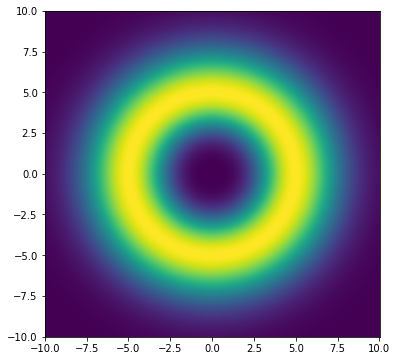

In [214]:
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,np.abs(HG(0,2,X,Y,0)/2+1j*HG(1,1,X,Y,0)/np.sqrt(2)-HG(2,0,X,Y,0)/2)**2,shading='auto')
plt.show()

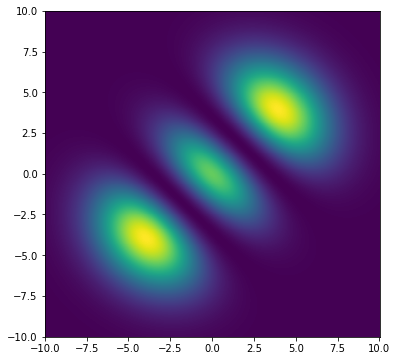

In [230]:
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,np.abs(HG(0,2,(X-Y)/np.sqrt(2),(X+Y)/np.sqrt(2),0))**2,shading='auto')
plt.show()

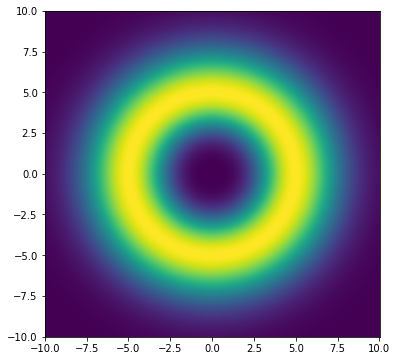

In [233]:
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,np.abs(u(0,2,X,Y,0))**2,shading='auto')
plt.show()